# Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

In [2]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score ,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

In [4]:
from xgboost import XGBClassifier

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Read and Crop images with OpenCv and save crop images in new folders as yes and no

#### 1.Yes Lable

In [46]:
for img in glob.glob('*.jpg'):
    try:
        pic=cv2.imread(img)
        print('Original Size--->',(pic.shape),end=' ,')
        gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        blurred = cv2.blur(gray, (3,3))
        canny = cv2.Canny(gray, 50, 200)
        pts = np.argwhere(canny>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)
        cropped = pic[y1:y2, x1:x2]
        newfile = '{}'.format(img)
        print('Cropped Size--->',cropped.shape,end=' ,')
        path = 'yes_crop'
        cv2.imwrite(os.path.join(path , newfile), cropped)
        
    except:
        pass


Original Size---> (630, 587, 3) ,Cropped Size---> (627, 526, 3) ,Original Size---> (354, 303, 3) ,Cropped Size---> (339, 278, 3) ,Original Size---> (350, 272, 3) ,Cropped Size---> (325, 265, 3) ,Original Size---> (630, 630, 3) ,Cropped Size---> (551, 463, 3) ,Original Size---> (316, 270, 3) ,Cropped Size---> (289, 245, 3) ,Original Size---> (630, 630, 3) ,Cropped Size---> (602, 473, 3) ,Original Size---> (277, 272, 3) ,Cropped Size---> (266, 230, 3) ,Original Size---> (352, 321, 3) ,Cropped Size---> (351, 314, 3) ,Original Size---> (938, 864, 3) ,Cropped Size---> (906, 788, 3) ,Original Size---> (334, 283, 3) ,Cropped Size---> (325, 275, 3) ,Original Size---> (355, 311, 3) ,Cropped Size---> (352, 309, 3) ,Original Size---> (283, 231, 3) ,Cropped Size---> (282, 225, 3) ,Original Size---> (1200, 1059, 3) ,Cropped Size---> (1058, 820, 3) ,Original Size---> (347, 300, 3) ,Cropped Size---> (346, 299, 3) ,Original Size---> (431, 400, 3) ,Cropped Size---> (429, 398, 3) ,Original Size---> (315

#### 2.No lable

In [24]:
for im in glob.glob('*.jpg'):
    try:
        pic=cv2.imread(im)
        # print(pic.shape)
        gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
        blurred = cv2.blur(gray, (3,3))
        canny = cv2.Canny(gray, 50, 200)
        pts = np.argwhere(canny>0)
        y1,x1 = pts.min(axis=0)
        y2,x2 = pts.max(axis=0)
        cropped = pic[y1:y2, x1:x2]
        newfile = '{}'.format(im)
        # print(cropped.shape)
        path = 'no'
        cv2.imwrite(os.path.join(path , newfile), cropped[:, :, 1])
    except:
        pass

### In this part the crop codes can not crop a few images very well so i crop them manually

## Create a dataframe using by yes and no cropped images

##### save yes and no in Image folder and make a dataset according to their lable

In [24]:
img_path = "image/"

In [25]:
lable=['yes','no']

In [26]:
img_list = []
label_list = []
for label in lable:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)
        
df = pd.DataFrame({'img':img_list, 'label':label_list})

In [27]:
df.tail()

,img,label
236,image/no/36 no.jpg,no
237,image/no/N26.jpg,no
238,image/no/25 no.jpg,no
239,image/no/3 no.jpg,no
240,image/no/no 94.jpg,no


In [28]:
df.isnull().sum()

img      0
label    0
dtype: int64

In [29]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237    False
238    False
239    False
240    False
Length: 241, dtype: bool

#### Show the number of yes and no lable

In [30]:
df['label'].value_counts()

yes    147
no      94
Name: label, dtype: int64

#### Show the image of category images

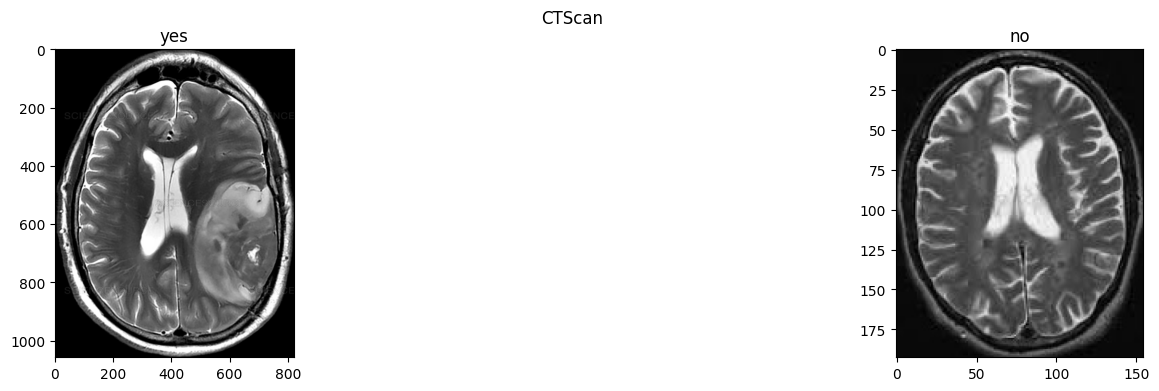

In [31]:
fig, ax = plt.subplots(ncols=len(lable), figsize=(20,4))
fig.suptitle('CTScan')
random_num = 12
for i,label in enumerate(lable):
    ax[i].set_title(label)
    ax[i].imshow(plt.imread(df[df['label']==label]['img'].iloc[random_num]))

## Data preprocessing

### Resize images and create X and Y Variables
#### for resizing of images use resize method and then divide them to 255

#### 1.X varaible

In [32]:
X = []
for img in df['img']:
    img = cv2.imread(str(img),cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96)).flatten()
    img = img/255
    X.append(img)

In [33]:
X[1]

array([0.01960784, 0.02352941, 0.02352941, ..., 0.01960784, 0.01960784,
       0.01960784])

In [34]:
len(X[1])

9216

In [35]:
X=np.asarray(X)

In [36]:
X[1]

array([0.01960784, 0.02352941, 0.02352941, ..., 0.01960784, 0.01960784,
       0.01960784])

In [37]:
X.shape

(241, 9216)

#### 2.Y variable

In [38]:
Y=df['label'].values

In [39]:
Y.shape

(241,)

## Splite test and train 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state = 42)

### LabelEncoder for Y(Lable)

In [41]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## Some functions for results of models

In [42]:
def Show(model):
    
    print(classification_report(y_test, Y_pred))

    cm = confusion_matrix(y_test, Y_pred)
    accuracy = accuracy_score(y_test,Y_pred)
    print('Confusion matrix \n',cm)
    print('accuracy: %.3f' %accuracy)
def table(model):
    test_score = accuracy_score(y_test, model.predict(X_test)) * 100
    train_score = accuracy_score(y_train, model.predict(X_train)) * 100

    results_df = pd.DataFrame(data=[[model[1], train_score, test_score]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
    print(results_df)
def plotROC(model):
    y_proba =model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    thresholds = thresholds[thresholds < 1]
    # f, ax = plt.subplots(figsize=(21, 10))
    # ploting FPR and TPR
    fig = go.Figure()
    
def no_tune(model):

    test_score = accuracy_score(y_test, model.predict(X_test)) * 100
    return test_score
    
def tune(model):
    test_score = accuracy_score(y_test, model.predict(X_test)) * 100
    return test_score
def AUC_no(model):
    y_proba =model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    return roc_auc
def AUC_yes(model):
    y_proba =model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    return roc_auc


  

# 1.XGBOOST

### model without tune hyperparameters

In [43]:
XG = XGBClassifier()
XG.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
Y_pred = XG.predict(X_test) 

In [45]:
Show(XG)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.81      0.83      0.82        30

    accuracy                           0.78        49
   macro avg       0.76      0.76      0.76        49
weighted avg       0.77      0.78      0.77        49

Confusion matrix 
 [[13  6]
 [ 5 25]]
accuracy: 0.776


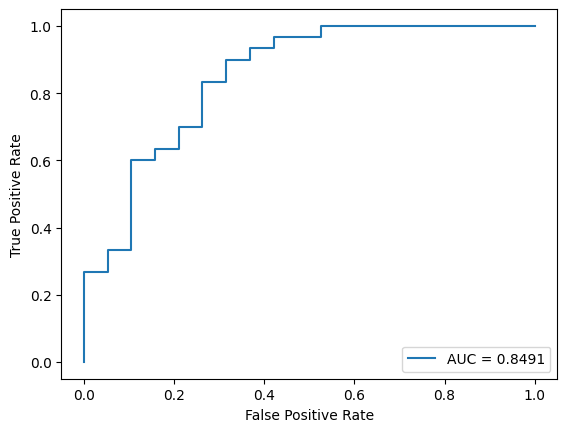

In [46]:
plotROC(XG)

## XGB Tune hyperparametres 

In [54]:
pipe_XGB = Pipeline([('pca',PCA()),
    ('xgb',XGBClassifier())])
param_tuning = {
        'xgb__max_depth': [3, 5, 7, 10,6,4,],
        "pca__n_components": np.arange(80,100)
        
    }
XGB_gridSearch = RandomizedSearchCV(pipe_XGB, param_tuning,cv=2, scoring='accuracy')


In [55]:
XGB_gridSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            inter...
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   param_distributions={'pca__n_components': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99]),
                                        'xgb__max_depth': [3, 5, 7, 10, 6, 4]},
                   scoring='accuracy')

In [56]:
print('GridSearch CV best score : {:.4f}\n\n'.format(XGB_gridSearch.best_score_))
print('Parameters that give the best results :','\n\n', (XGB_gridSearch.best_params_))

GridSearch CV best score : 0.7240


Parameters that give the best results : 

 {'xgb__max_depth': 10, 'pca__n_components': 87}


### Tune Model

In [57]:
XGB = make_pipeline(PCA(n_components=87),XGBClassifier(max_depth=10))
XGB.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=87)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [58]:
Y_pred = XGB.predict(X_test) 

In [59]:
Show(XGB)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.87      0.90      0.89        30

    accuracy                           0.86        49
   macro avg       0.85      0.84      0.85        49
weighted avg       0.86      0.86      0.86        49

Confusion matrix 
 [[15  4]
 [ 3 27]]
accuracy: 0.857


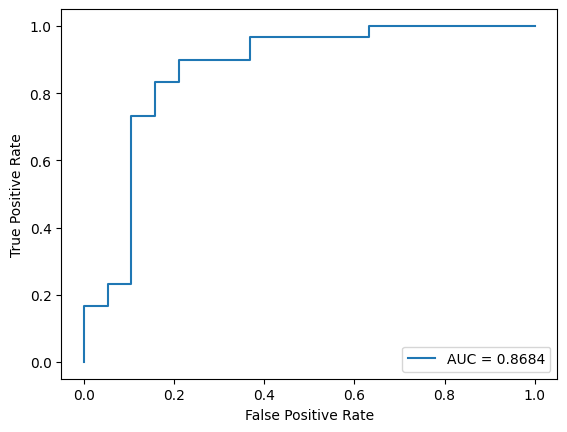

In [60]:
plotROC(XGB)

# 2.SVC

### Model without tune Hyperparameters

In [61]:
Svc = SVC(probability=True)

Svc.fit(X_train, y_train)

SVC(probability=True)

In [62]:
Y_pred = Svc.predict(X_test) 

In [63]:
Show(Svc)

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.82      0.90      0.86        30

    accuracy                           0.82        49
   macro avg       0.82      0.79      0.80        49
weighted avg       0.82      0.82      0.81        49

Confusion matrix 
 [[13  6]
 [ 3 27]]
accuracy: 0.816


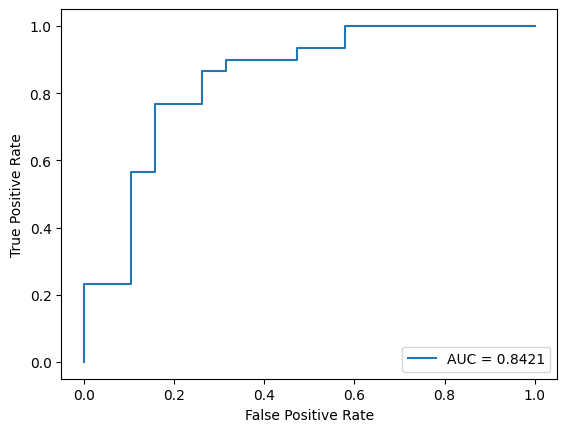

In [64]:
plotROC(Svc)

## SVC Tune Hyperparameters

In [65]:
pipe = make_pipeline(PCA(random_state=42), SVC())
param_grid={"pca__n_components": np.arange(80,100),'svc__gamma': [0.001, 0.01], 'svc__C': [0.1, 1, 10]}
clf_gridSearch = RandomizedSearchCV(pipe, param_grid,cv=2, scoring='accuracy')

In [66]:
clf_gridSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('svc', SVC())]),
                   param_distributions={'pca__n_components': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99]),
                                        'svc__C': [0.1, 1, 10],
                                        'svc__gamma': [0.001, 0.01]},
                   scoring='accuracy')

In [67]:
print('GridSearch CV best score : {:.4f}\n\n'.format(clf_gridSearch.best_score_))
print('Parameters that give the best results :','\n\n', (clf_gridSearch.best_params_))

GridSearch CV best score : 0.7135


Parameters that give the best results : 

 {'svc__gamma': 0.01, 'svc__C': 10, 'pca__n_components': 85}


## Tune model

In [69]:
svc = make_pipeline(PCA(n_components=85),SVC(C=10,gamma=0.01,probability=True))
svc.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=85)),
                ('svc', SVC(C=10, gamma=0.01, probability=True))])

In [70]:
Y_pred = svc.predict(X_test) 

In [71]:
Show(svc)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        19
           1       0.86      0.80      0.83        30

    accuracy                           0.80        49
   macro avg       0.79      0.79      0.79        49
weighted avg       0.80      0.80      0.80        49

Confusion matrix 
 [[15  4]
 [ 6 24]]
accuracy: 0.796


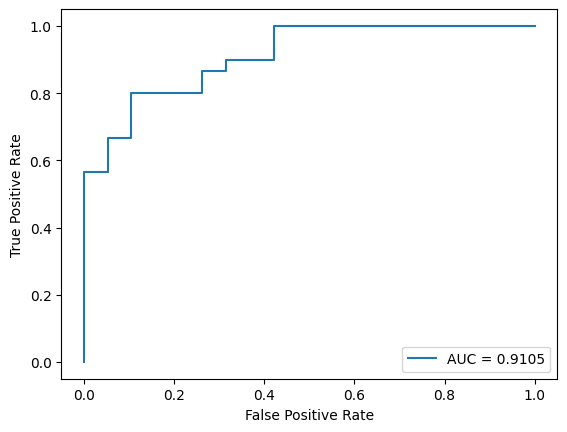

In [72]:
plotROC(svc)

# 3.LogosticRegression

## without tune hyperparameters

In [73]:
log= make_pipeline(LogisticRegression())
log.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression())])

In [74]:
Y_pred = log.predict(X_test) 

In [75]:
Show(log)

              precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.75      0.70      0.72        30

    accuracy                           0.67        49
   macro avg       0.66      0.67      0.66        49
weighted avg       0.68      0.67      0.68        49

Confusion matrix 
 [[12  7]
 [ 9 21]]
accuracy: 0.673


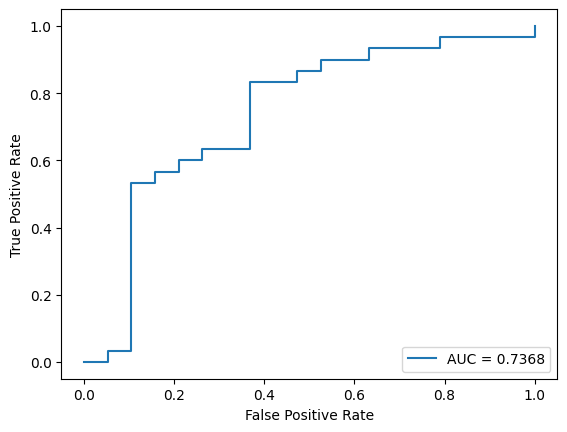

In [76]:
plotROC(log)

## Logisticreg Tune haperparameters

In [77]:
params={"pca__n_components": np.arange(80,100),'model__C':[.01,.05,1]}
pipeline = Pipeline([('pca',PCA()),
    ('model',LogisticRegression(max_iter=1000))])
grid = GridSearchCV(pipeline, cv=2,n_jobs=-1, param_grid=params ,scoring='f1_macro')

In [79]:
grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.05, 1],
                         'pca__n_components': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])},
             scoring='f1_macro')

In [80]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

print('Parameters that give the best results :','\n\n', (grid.best_params_))

GridSearch CV best score : 0.7046


Parameters that give the best results : 

 {'model__C': 1, 'pca__n_components': 84}


## Tune model

In [81]:
logistic = make_pipeline(PCA(n_components=84),LogisticRegression(C=1))
logistic.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=84)),
                ('logisticregression', LogisticRegression(C=1))])

In [82]:
Y_pred = logistic.predict(X_test) 

In [83]:
Show(logistic)

              precision    recall  f1-score   support

           0       0.59      0.68      0.63        19
           1       0.78      0.70      0.74        30

    accuracy                           0.69        49
   macro avg       0.68      0.69      0.69        49
weighted avg       0.71      0.69      0.70        49

Confusion matrix 
 [[13  6]
 [ 9 21]]
accuracy: 0.694


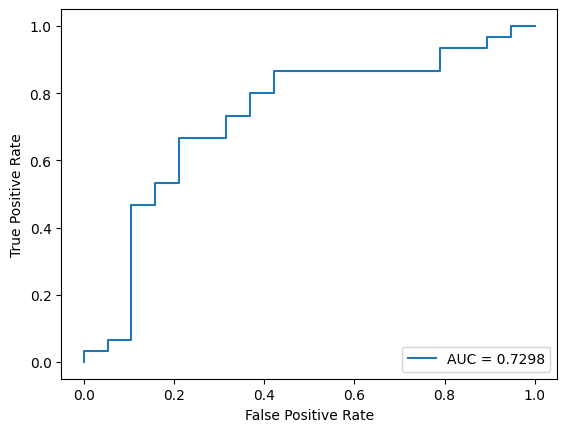

In [84]:
plotROC(logistic)

# 4.KNN

## Without tune hyperparameters

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn_= KNeighborsClassifier()
knn_.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
Y_pred = knn_.predict(X_test) 

In [88]:
Show(knn_)

              precision    recall  f1-score   support

           0       0.53      0.84      0.65        19
           1       0.84      0.53      0.65        30

    accuracy                           0.65        49
   macro avg       0.69      0.69      0.65        49
weighted avg       0.72      0.65      0.65        49

Confusion matrix 
 [[16  3]
 [14 16]]
accuracy: 0.653


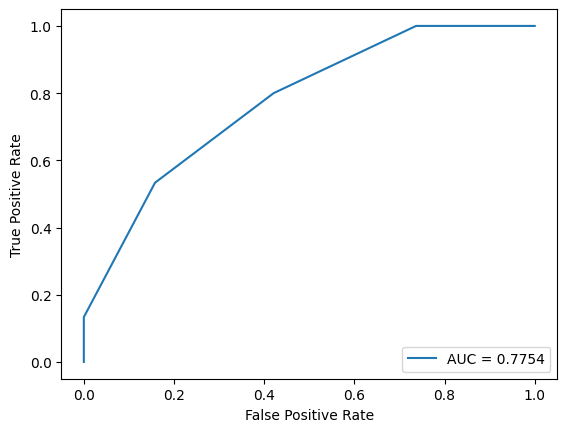

In [89]:
plotROC(knn_)

## KNN Tune Hyperparameters

In [90]:
pipe1 = Pipeline([('pca',PCA()),
    ('clf', KNeighborsClassifier()),
])


parameters = {"pca__n_components": np.arange(80, 100),
    'clf__n_neighbors': range(1,5)
    }

gs = GridSearchCV(pipe1, parameters,cv=2,n_jobs=-1, scoring='f1_macro')
gs.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': range(1, 5),
                         'pca__n_components': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])},
             scoring='f1_macro')

In [91]:
print('GridSearch CV best score : {:.4f}\n\n'.format(gs.best_score_))
print('Parameters that give the best results :','\n\n', (gs.best_params_))

GridSearch CV best score : 0.6877


Parameters that give the best results : 

 {'clf__n_neighbors': 3, 'pca__n_components': 85}


## Tune model

In [92]:
knn= make_pipeline(PCA(n_components=85),KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=85)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [93]:
Y_pred = knn.predict(X_test) 

In [94]:
Show(knn)

              precision    recall  f1-score   support

           0       0.57      0.84      0.68        19
           1       0.86      0.60      0.71        30

    accuracy                           0.69        49
   macro avg       0.71      0.72      0.69        49
weighted avg       0.75      0.69      0.70        49

Confusion matrix 
 [[16  3]
 [12 18]]
accuracy: 0.694


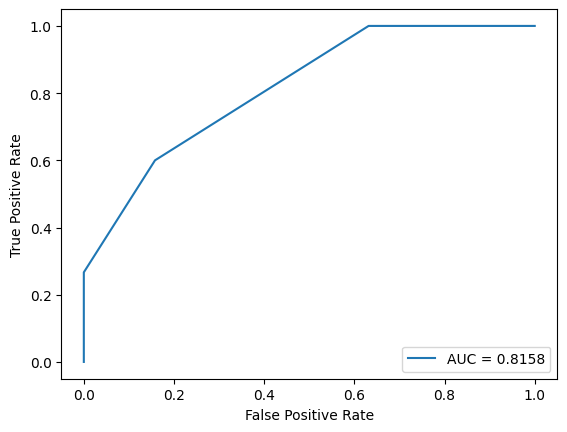

In [95]:
plotROC(knn)

# 5.RandomForestClassifier

## Model without HyperParameters

In [96]:
random_=  RandomForestClassifier()
random_.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
Y_pred = random_.predict(X_test) 

In [98]:
Show(random_)

              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.76      0.83      0.79        30

    accuracy                           0.73        49
   macro avg       0.72      0.71      0.71        49
weighted avg       0.73      0.73      0.73        49

Confusion matrix 
 [[11  8]
 [ 5 25]]
accuracy: 0.735


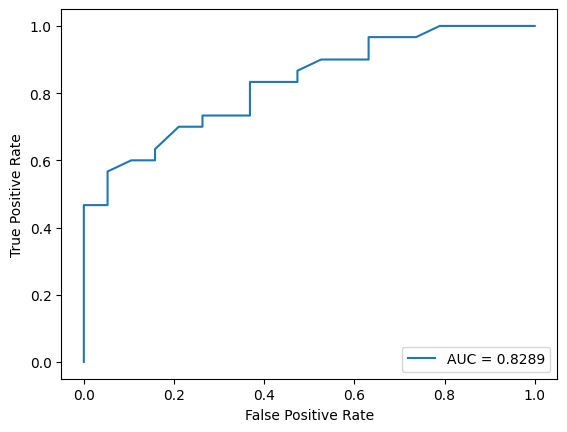

In [99]:
plotROC(random_)

## Tune Hyperparametres

In [100]:
rf_pipeline = Pipeline([('pca',PCA()),
                       ("RF", RandomForestClassifier())])

grid = {"pca__n_components": np.arange(80, 100),
    'RF__max_depth' : [1,5,10]

}
grid_search_cv = GridSearchCV(rf_pipeline, grid,cv=2,  n_jobs = -1)

In [101]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RF', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RF__max_depth': [1, 5, 10],
                         'pca__n_components': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])})

In [102]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_cv.best_score_))


print('Parameters that give the best results :','\n\n', (grid_search_cv.best_params_))

GridSearch CV best score : 0.7396


Parameters that give the best results : 

 {'RF__max_depth': 10, 'pca__n_components': 81}


## Tune model

In [103]:
random= make_pipeline(PCA(n_components=81),RandomForestClassifier(max_depth=10))
random.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=81)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10))])

In [104]:
Y_pred = random.predict(X_test) 

In [105]:
Show(random)

              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.83      0.97      0.89        30

    accuracy                           0.86        49
   macro avg       0.88      0.83      0.84        49
weighted avg       0.87      0.86      0.85        49

Confusion matrix 
 [[13  6]
 [ 1 29]]
accuracy: 0.857


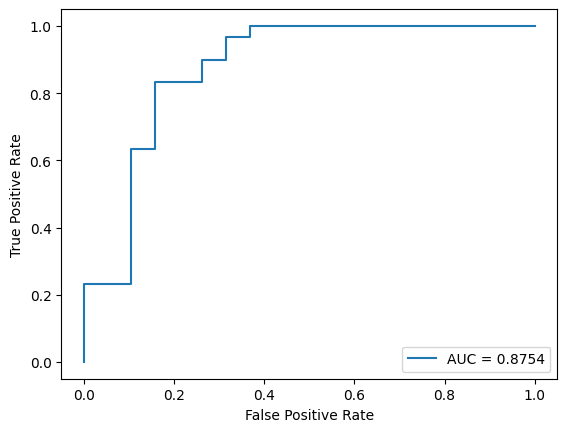

In [106]:
plotROC(random)

# Final result

In [107]:
data={'Model':['XGBOOST','SVM','LogosticRegression','knn','RandomForest'],'Accuracy_no_tune':[no_tune(XG),no_tune(Svc),no_tune(log),no_tune(knn_),no_tune(random_)],
     'Accuracy_with_tune':[tune(XGB),tune(svc),tune(logistic),tune(knn),tune(random)],'AUC_no_tune':[AUC_no(XG),AUC_no(Svc),AUC_no(log),AUC_no(knn_),AUC_no(random_)],
     'AUC_yes_tune':[AUC_yes(XGB),AUC_yes(svc),AUC_yes(logistic),AUC_yes(knn),AUC_yes(random)]}
result=pd.DataFrame(data)
result

,Model,Accuracy_no_tune,Accuracy_with_tune,AUC_no_tune,AUC_yes_tune
0,XGBOOST,77.551020,85.714286,0.849123,0.868421
1,SVM,81.632653,79.591837,0.842105,0.910526
2,LogosticRegression,67.346939,69.387755,0.736842,0.729825
3,knn,65.306122,69.387755,0.775439,0.815789
4,RandomForest,73.469388,85.714286,0.828947,0.875439


### The high accuracy belongs to XGBOOST=85% and randomforest=85% after find the best hyperparameters and reduce the dimension with Pca